In [1]:
import numpy as np
import pymc as pm
from matplotlib import pyplot as plt

In [2]:
a = np.random.poisson(lam=10, size=100) 
b = np.random.poisson(lam=5, size=50) 
c = np.random.poisson(lam=15, size=120) 

data = np.hstack((a,b,c))

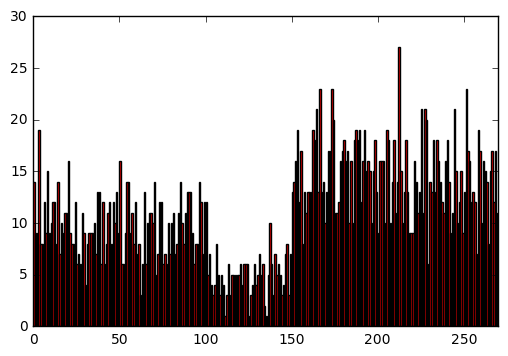

In [3]:
n = len(data)
plt.bar(np.arange(n), data, color='r')
plt.xlim(0,n)

plt.show()

In [4]:
alpha = 1.0 / data.mean()

lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=n)

In [5]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n)
    out[:tau] = lambda_1
    out[tau:] = lambda_2
    return out

observation = pm.Poisson("obs", lambda_, value=data, observed=True)
model = pm.Model([observation, lambda_1, lambda_2, tau])

In [6]:
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000)

 [-----------------100%-----------------] 40000 of 40000 complete in 7.1 sec

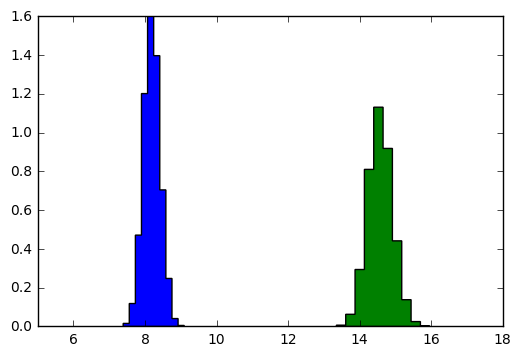

In [7]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

plt.hist(lambda_1_samples, histtype='stepfilled', normed=True, label="posteriro of $\lambda_1$")
plt.hist(lambda_2_samples, histtype='stepfilled', normed=True, label="posteriro of $\lambda_2$")
plt.xlim([5,18])
plt.ylim([0,1.6])
plt.show()

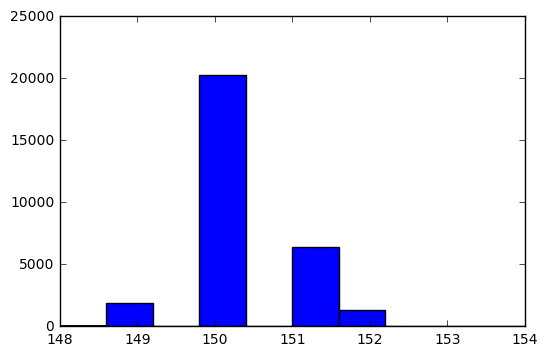

In [8]:
plt.hist(tau_samples, label="posteriro of $\tau$")
plt.show()

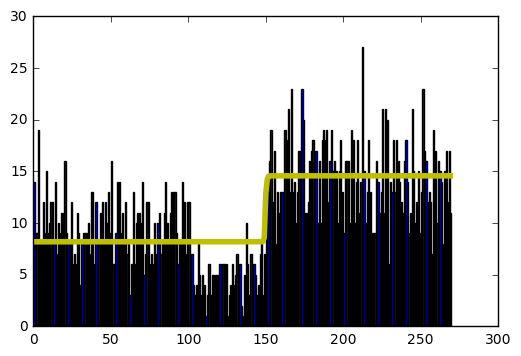

In [10]:
n_tau = tau_samples.shape[0]
expted_values = np.zeros(n)

for value in range(0, n):
    ix = value < tau_samples
    
    expted_values[value] = (lambda_1_samples[ix].sum() + lambda_2_samples[~ix].sum()) / n_tau

plt.plot(range(n), expted_values, lw=4, color='y', label='expected values form MCMC')
plt.bar(np.arange(n), data)

plt.show()